# FOURIER TRANSFORM OF OSCILLATOR RESPONSE

## Brewster FFT

## Alastair McLean

In the following cell we load all the Python code we need. You can see we will use numpy, matplotlib and scipy.optimize. The latter contains the code that will be used to perform the non-linear least squares lineshape fits. We also include some Python code I wrote for performing the fast Fourier transform called Brewster_fft. The other lines just specify which lineshapes we want to use from the fitting package (lmfit). You can read the [manual](https://lmfit.github.io/lmfit-py/intro.html) if you want more information. 

In [1]:
import numpy as np
import scipy.optimize
import brewster_fft as br
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel
from lmfit.models import LorentzianModel
from lmfit.models import VoigtModel
from lmfit.models import LinearModel
from lmfit.models import QuadraticModel
%matplotlib inline

# Data for oscillator coupled at 0

In [2]:
# sampling rate 100 Hz
r  = np.loadtxt("/Users/alisonandrade/zphys250/Tutorials/Week_8/Data/Data8.csv")

In [3]:
# Enter your sample rate here.
# The code calculates the time interval between samples from the sample rate. 
samplerate = 100.0
dt = 1/samplerate
print("The sampling rate =%10.3e"% samplerate)
print("The time interval =%10.3e"% dt)
# I define the time array. 
t = np.arange(start = 0.0, stop = np.size(r)*dt, step = dt)

The sampling rate = 1.000e+02
The time interval = 1.000e-02


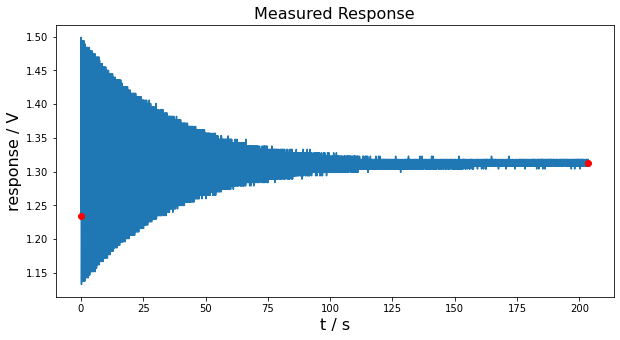

In [4]:
# defaults sizes for the plots
width = 10
height = 5
# default value for start is 0. 
start = 0
# default value for stop is the last index of the array.
stop = np.size(r)-1
br.plotwaveandtwopoints(width, height, t, r,\
                     "t / s", "response / V", "Measured Response", False, start, stop)

In [5]:
# Now that start and stop have been selected, we truncate the two arrays appropriately.
tt=t[start:stop]
rr=r[start:stop]

### The power spectrum

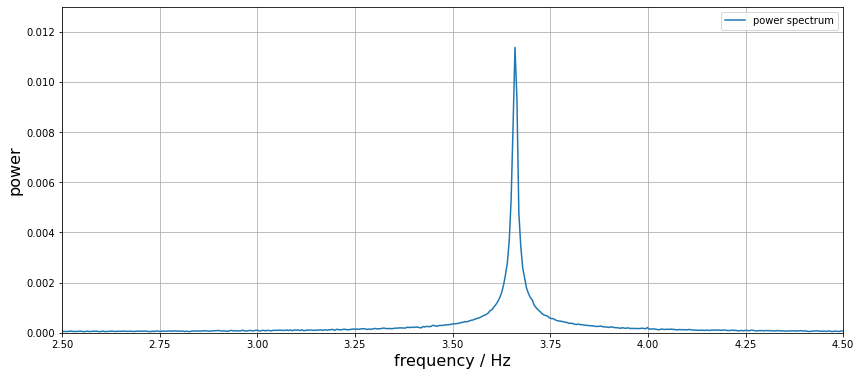

In [6]:
# We now calculate the power spectrum of the response examining 
# only the range between startfrequency and stopfrequency.
power_data, f = br.calculatepowerspectrum(rr, dt)
br.plotpowerspectrum(f, power_data, startfrequency = 2.5, stopfrequency = 4.50, 
                  save = True, name ="Coupled0.pdf", ymax = 0.013)

### Finding the positions of the peaks using least-squares fitting

In [7]:
# We have to truncate the power spectrum so that we have only the frequencies around the eigenfrequencies.
# This function finds the indexes that correspond to lower and upper frequency bounds that we select.
# The natural frequency of the oscillator is close to 3.8 Hz, so we normally choose a narrow range around this value. 
def find_lower_upper_indices(lower,upper,x):
    t_lower=0
    t_upper=0
    for i in range(len(x)):
        if x[i] < lower:
            t_lower=i
        if x[i] < upper:
            t_upper = i
    return t_lower, t_upper

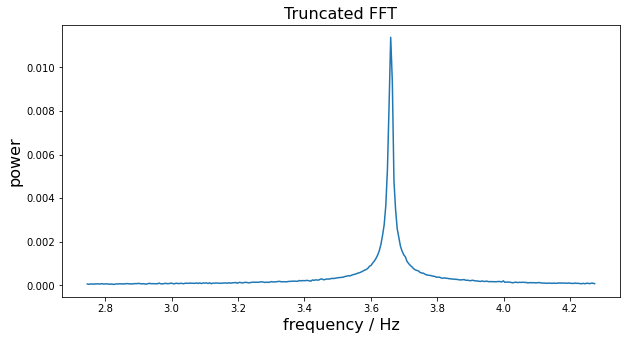

In [8]:
# We now truncate the power spectrum to contain only frequencies in a narrow range 
# centered on the natural frequency of the oscillator. 
#start, stop = find_lower_upper_indices(2.50,4.53,f)
start, stop = find_lower_upper_indices(2.75,4.28,f)
#print(start,stop)
ff=f[start:stop]
pp=power_data[start:stop]
br.plotwave(width, height, ff, pp, "frequency / Hz", "power", "Truncated FFT", False)

## LMFit Solution

[[Model]]
    Model(lorentzian, prefix='one_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 262
    # data points      = 312
    # variables        = 3
    chi-square         = 1.9584e-05
    reduced chi-square = 6.3377e-08
    Akaike info crit   = -5168.15364
    Bayesian info crit = -5156.92463
[[Variables]]
    one_amplitude:  3.8782e-04 +/- 6.8179e-06 (1.76%) (init = 0.015)
    one_center:     3.65996137 +/- 2.0902e-04 (0.01%) (init = 3.6)
    one_sigma:      0.01188358 +/- 2.9537e-04 (2.49%) (init = 0.001)
    one_fwhm:       0.02376715 +/- 5.9073e-04 (2.49%) == '2.0000000*one_sigma'
    one_height:     0.01038791 +/- 1.8260e-04 (1.76%) == '0.3183099*one_amplitude/max(1e-15, one_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(one_amplitude, one_sigma) =  0.707


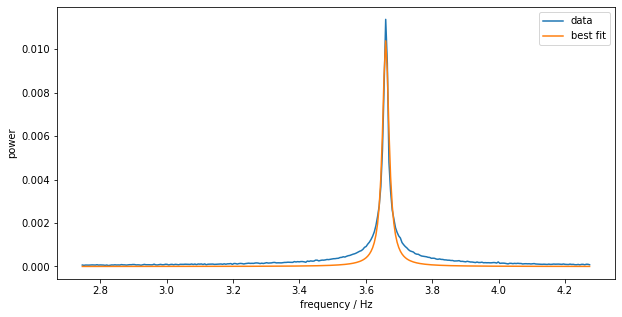

In [9]:
# we are going to fit a lorentzian function
lor1 = LorentzianModel(prefix='one_')
# estimate the parameters for the first lorentzian
lor1_pars = lor1.make_params(amplitude=0.015, center=3.60,sigma=0.001)
# we are going to fit another lorentzian function
#lor2 = LorentzianModel(prefix='two_')
# estimate the parameters for the first lorentzian
#lor2_pars = lor2.make_params(amplitude=0.005, center=3.80,sigma=0.001)
mod = lor1
# appends the background parameters to the lorentzian parameters
#lor1_pars += lor2_pars
results = mod.fit(pp, lor1_pars, x=ff)
print(results.fit_report())
plt.figure(figsize=(width,height))
plt.plot(ff, pp, label='data')
#plt.plot(ff, out.init_fit, label='initial fit')
plt.plot(ff, results.best_fit, label='best fit')
plt.legend(loc='best')
plt.xlabel('frequency / Hz')
plt.ylabel('power')
plt.show()

# Data for oscillatior coupled at +100

In [10]:
# sampling rate 100 Hz
r  = np.loadtxt("/Users/alisonandrade/zphys250/Tutorials/Week_8/Data/Data6.csv")

In [11]:
# Enter your sample rate here.
# The code calculates the time interval between samples from the sample rate. 
samplerate = 100.0
dt = 1/samplerate
print("The sampling rate =%10.3e"% samplerate)
print("The time interval =%10.3e"% dt)
# I define the time array. 
t = np.arange(start = 0.0, stop = np.size(r)*dt, step = dt)

The sampling rate = 1.000e+02
The time interval = 1.000e-02


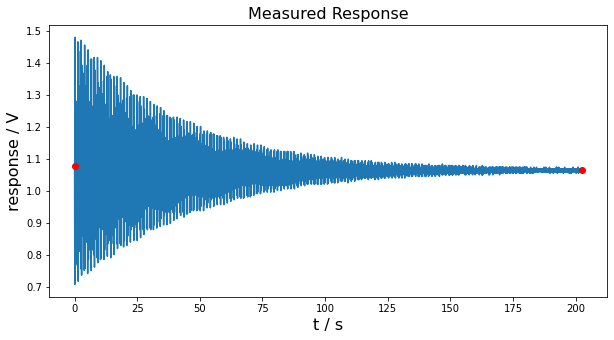

In [12]:
# defaults sizes for the plots
width = 10
height = 5
# default value for start is 0. 
start = 0
# default value for stop is the last index of the array.
stop = np.size(r)-1
br.plotwaveandtwopoints(width, height, t, r,\
                     "t / s", "response / V", "Measured Response", False, start, stop)

In [13]:
# Now that start and stop have been selected, we truncate the two arrays appropriately.
tt=t[start:stop]
rr=r[start:stop]

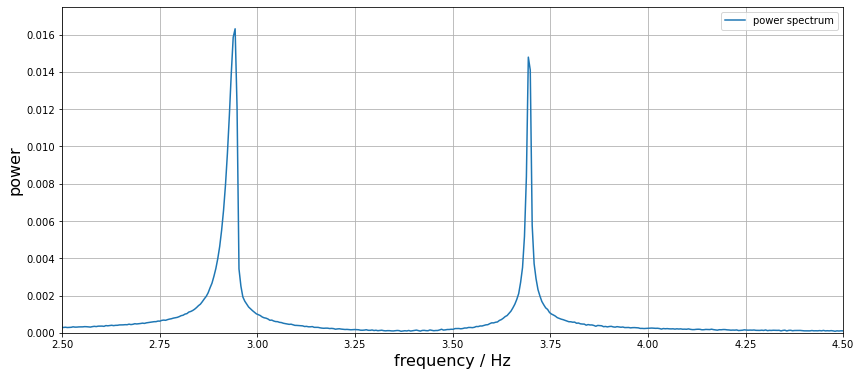

In [14]:
# We now calculate the power spectrum of the response examining 
# only the range between startfrequency and stopfrequency.
power_data, f = br.calculatepowerspectrum(rr, dt)
br.plotpowerspectrum(f, power_data, startfrequency = 2.5, stopfrequency = 4.50, 
                  save = True, name ="Coupled100.pdf", ymax = 0.0175)

In [15]:
# We have to truncate the power spectrum so that we have only the frequencies around the eigenfrequencies.
# This function finds the indexes that correspond to lower and upper frequency bounds that we select.
# The natural frequency of the oscillator is close to 3.8 Hz, so we normally choose a narrow range around this value. 
def find_lower_upper_indices(lower,upper,x):
    t_lower=0
    t_upper=0
    for i in range(len(x)):
        if x[i] < lower:
            t_lower=i
        if x[i] < upper:
            t_upper = i
    return t_lower, t_upper

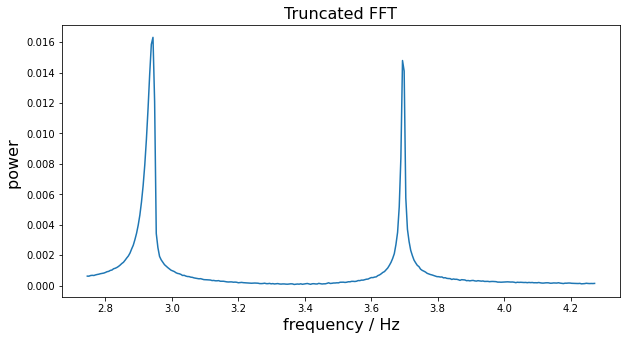

In [16]:
# We now truncate the power spectrum to contain only frequencies in a narrow range 
# centered on the natural frequency of the oscillator. 
#start, stop = find_lower_upper_indices(2.50,4.53,f)
start, stop = find_lower_upper_indices(2.75,4.28,f)
#print(start,stop)
ff=f[start:stop]
pp=power_data[start:stop]
br.plotwave(width, height, ff, pp, "frequency / Hz", "power ", "Truncated FFT", False)

[[Model]]
    (Model(lorentzian, prefix='one_') + Model(lorentzian, prefix='two_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 348
    # data points      = 310
    # variables        = 6
    chi-square         = 1.1167e-04
    reduced chi-square = 3.6733e-07
    Akaike info crit   = -4587.33421
    Bayesian info crit = -4564.91478
[[Variables]]
    one_amplitude:  8.1765e-04 +/- 1.9529e-05 (2.39%) (init = 0.015)
    one_center:     2.93558613 +/- 3.9888e-04 (0.01%) (init = 3)
    one_sigma:      0.01670895 +/- 5.6442e-04 (3.38%) (init = 0.001)
    one_fwhm:       0.03341790 +/- 0.00112884 (3.38%) == '2.0000000*one_sigma'
    one_height:     0.01557641 +/- 3.7187e-04 (2.39%) == '0.3183099*one_amplitude/max(1e-15, one_sigma)'
    two_amplitude:  4.0267e-04 +/- 1.3945e-05 (3.46%) (init = 0.014)
    two_center:     3.69560720 +/- 2.9275e-04 (0.01%) (init = 3.7)
    two_sigma:      0.00849885 +/- 4.1787e-04 (4.92%) (init = 0.001)
    two_fwhm:       0.01699

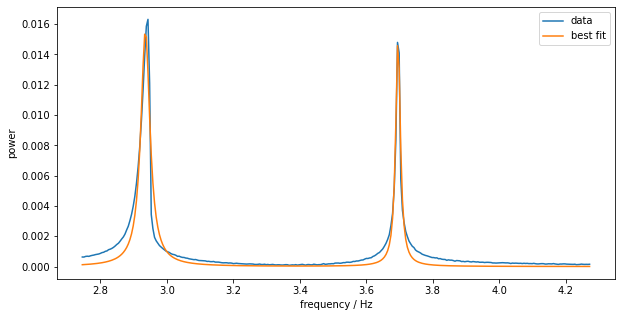

In [17]:
# we are going to fit a lorentzian function
lor1 = LorentzianModel(prefix='one_')
# estimate the parameters for the first lorentzian
lor1_pars = lor1.make_params(amplitude=0.015, center=3.00,sigma=0.001)
# we are going to fit another lorentzian function
lor2 = LorentzianModel(prefix='two_')
# estimate the parameters for the first lorentzian
lor2_pars = lor2.make_params(amplitude=0.014, center=3.70,sigma=0.001)
mod = lor1 + lor2
# appends the background parameters to the lorentzian parameters
lor1_pars += lor2_pars
results = mod.fit(pp, lor1_pars, x=ff)
print(results.fit_report())
plt.figure(figsize=(width,height))
plt.plot(ff, pp, label='data')
#plt.plot(ff, out.init_fit, label='initial fit')
plt.plot(ff, results.best_fit, label='best fit')
plt.legend(loc='best')
plt.xlabel('frequency / Hz')
plt.ylabel('power')
plt.show()

# Data for oscillator coupled at -100

In [18]:
# sampling rate 100 Hz
r  = np.loadtxt("/Users/alisonandrade/zphys250/Tutorials/Week_8/Data/Data3.csv")

In [19]:
# Enter your sample rate here.
# The code calculates the time interval between samples from the sample rate. 
samplerate = 100.0
dt = 1/samplerate
print("The sampling rate =%10.3e"% samplerate)
print("The time interval =%10.3e"% dt)
# I define the time array. 
t = np.arange(start = 0.0, stop = np.size(r)*dt, step = dt)

The sampling rate = 1.000e+02
The time interval = 1.000e-02


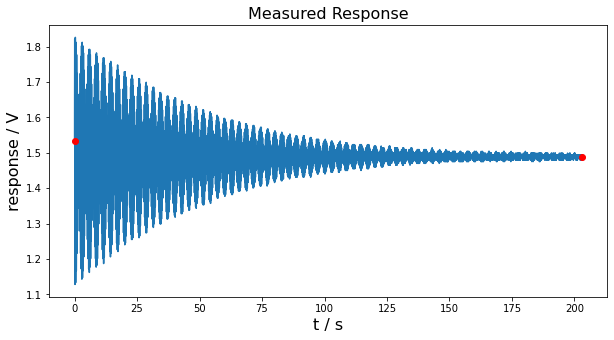

In [20]:
# defaults sizes for the plots
width = 10
height = 5
# default value for start is 0. 
start = 0
# default value for stop is the last index of the array.
stop = np.size(r)-1
br.plotwaveandtwopoints(width, height, t, r,\
                     "t / s", "response / V", "Measured Response", False, start, stop)

In [21]:
# Now that start and stop have been selected, we truncate the two arrays appropriately.
tt=t[start:stop]
rr=r[start:stop]

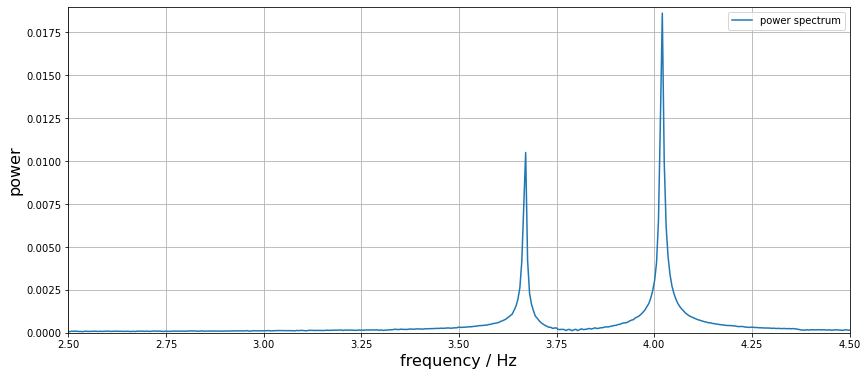

In [22]:
# We now calculate the power spectrum of the response examining 
# only the range between startfrequency and stopfrequency.
power_data, f = br.calculatepowerspectrum(rr, dt)
br.plotpowerspectrum(f, power_data, startfrequency = 2.5, stopfrequency = 4.50, 
                  save = True, name ="Coupled-100.pdf", ymax = 0.019)

In [23]:
# We have to truncate the power spectrum so that we have only the frequencies around the eigenfrequencies.
# This function finds the indexes that correspond to lower and upper frequency bounds that we select.
# The natural frequency of the oscillator is close to 3.8 Hz, so we normally choose a narrow range around this value. 
def find_lower_upper_indices(lower,upper,x):
    t_lower=0
    t_upper=0
    for i in range(len(x)):
        if x[i] < lower:
            t_lower=i
        if x[i] < upper:
            t_upper = i
    return t_lower, t_upper

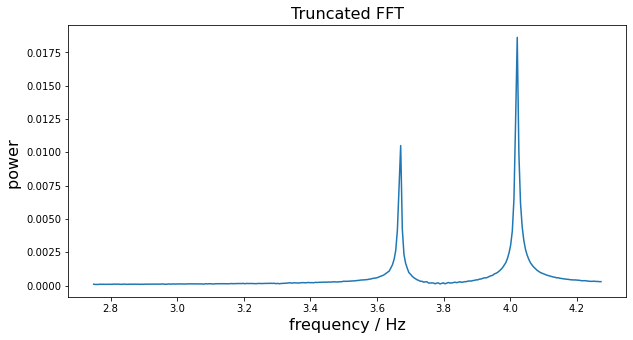

In [24]:
# We now truncate the power spectrum to contain only frequencies in a narrow range 
# centered on the natural frequency of the oscillator. 
#start, stop = find_lower_upper_indices(2.50,4.53,f)
start, stop = find_lower_upper_indices(2.75,4.28,f)
#print(start,stop)
ff=f[start:stop]
pp=power_data[start:stop]
br.plotwave(width, height, ff, pp, "frequency / Hz", "power ", "Truncated FFT", False)

[[Model]]
    (Model(lorentzian, prefix='one_') + Model(lorentzian, prefix='two_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 493
    # data points      = 310
    # variables        = 6
    chi-square         = 4.9258e-05
    reduced chi-square = 1.6203e-07
    Akaike info crit   = -4841.05039
    Bayesian info crit = -4818.63096
[[Variables]]
    one_amplitude:  2.2510e-04 +/- 8.5570e-06 (3.80%) (init = 0.01)
    one_center:     3.66926284 +/- 2.7064e-04 (0.01%) (init = 3.65)
    one_sigma:      0.00722383 +/- 3.9332e-04 (5.44%) (init = 0.001)
    one_fwhm:       0.01444765 +/- 7.8663e-04 (5.44%) == '2.0000000*one_sigma'
    one_height:     0.00991891 +/- 3.8018e-04 (3.83%) == '0.3183099*one_amplitude/max(1e-15, one_sigma)'
    two_amplitude:  4.4759e-04 +/- 9.1791e-06 (2.05%) (init = 0.0175)
    two_center:     4.02020755 +/- 1.7509e-04 (0.00%) (init = 4)
    two_sigma:      0.00845041 +/- 2.4338e-04 (2.88%) (init = 0.001)
    two_fwhm:       0.0169

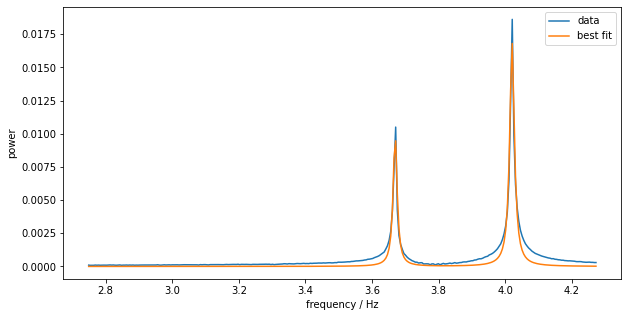

In [25]:
# we are going to fit a lorentzian function
lor1 = LorentzianModel(prefix='one_')
# estimate the parameters for the first lorentzian
lor1_pars = lor1.make_params(amplitude=0.01, center=3.65,sigma=0.001)
# we are going to fit another lorentzian function
lor2 = LorentzianModel(prefix='two_')
# estimate the parameters for the first lorentzian
lor2_pars = lor2.make_params(amplitude=0.0175, center=4.00,sigma=0.001)
mod = lor1 + lor2
# appends the background parameters to the lorentzian parameters
lor1_pars += lor2_pars
results = mod.fit(pp, lor1_pars, x=ff)
print(results.fit_report())
plt.figure(figsize=(width,height))
plt.plot(ff, pp, label='data')
#plt.plot(ff, out.init_fit, label='initial fit')
plt.plot(ff, results.best_fit, label='best fit')
plt.legend(loc='best')
plt.xlabel('frequency / Hz')
plt.ylabel('power')
plt.show()

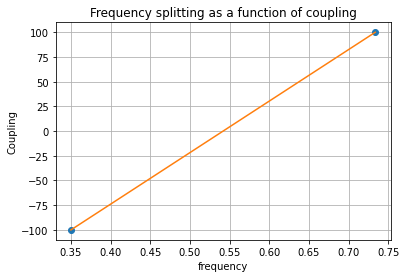

In [34]:
#frequency splitting as a function of coupling
x = [0.35, 0.7337]
y = [-100, 100]
plt.plot(x, y, 'o')
plt.plot(x,y)
plt.xlabel('frequency')
plt.ylabel('Coupling')
plt.title('Frequency splitting as a function of coupling')
plt.grid()